# MSc Data Science: intro to lasso

First we install the ppls and glmnet packages. Once again, we will take the cookie data set. The features are NIR spectra from cookies, and we have 4 responses: the percentages of fat, sucrose, dry flour, and water.

In [1]:
install.packages("ppls")
install.packages("glmnet")

Warning message:
“package ‘ppls’ is not available (for R version 3.6.3)”



The downloaded binary packages are in
	/var/folders/n2/vcmhff3d5b370hsbg6c1w4bh00m7lx/T//RtmpaWZu0w/downloaded_packages


In [2]:
library("ppls")
library("glmnet")

Loading required package: splines

Loading required package: MASS

Loading required package: Matrix

Loaded glmnet 4.1



In [3]:
data(cookie)
cookie = scale(cookie)

head(cookie)

,1,2,3,4,5,6,7,8,9,10,⋯,695,696,697,698,699,700,V1,V2,V3,V4
1,-1.26889100,-1.26636681,-1.27598292,-1.29202429,-1.29885141,-1.29368771,-1.29631791,-1.29819121,-1.292759,-1.28315881,⋯,-0.8046859,-0.8099232,-0.8150090,-0.8241092,-0.8268850,-0.8254018,1.40748489,-0.8385830,0.4055605,-0.4121681
2,-0.95859459,-0.95152738,-0.93431237,-0.92153112,-0.90612435,-0.90785112,-0.92360257,-0.93614633,-0.947793,-0.94280786,⋯,-0.6444824,-0.6498221,-0.6533320,-0.6484920,-0.6501207,-0.6440928,0.03069414,-0.2417450,0.2371955,0.1473768
3,-0.03147854,-0.02827601,-0.02151026,-0.02467465,-0.02301731,-0.03886214,-0.03619209,-0.04325184,-0.033688,-0.03390672,⋯,-0.9716188,-0.9744372,-0.9830763,-0.9757691,-0.9771630,-0.9736857,-1.50358929,0.6317389,-0.1288155,0.5720916
4,-1.57228643,-1.56430178,-1.55571579,-1.55540293,-1.56608094,-1.57373987,-1.58066853,-1.58727111,-1.583887,-1.57739267,⋯,-1.4519037,-1.4451075,-1.4404688,-1.4334222,-1.4265567,-1.4138340,1.66658573,0.7188312,-1.2488092,-1.8009182
5,-1.58867008,-1.58779948,-1.58146960,-1.57170404,-1.58492279,-1.59028551,-1.58555596,-1.57805294,-1.574232,-1.56458507,⋯,-1.2958247,-1.2886659,-1.2876319,-1.2796130,-1.2752502,-1.2674719,-0.21824589,-0.3185911,0.4055605,0.3833295
6,-1.08728072,-1.08735797,-1.08245859,-1.07198395,-1.06192625,-1.07012570,-1.07071419,-1.06851731,-1.071072,-1.07979559,⋯,-1.0189418,-1.0188888,-1.0173182,-1.0089529,-1.0053465,-1.0003889,1.49385184,-1.0972982,0.6178469,-0.2301475


Like last week, we begin by creating a training and test sets:

In [4]:
n = dim(cookie)[1]
p = 700
ind_test = sample(n,15)
X = cookie[-ind_test,1:700]
Y = scale(cookie[-ind_test,701])
Xtest = cookie[ind_test,1:700]
Ytest = scale(cookie[ind_test,701])

We'll now fit use the lasso on the training set:

In [5]:
fit = glmnet(X, Y) 

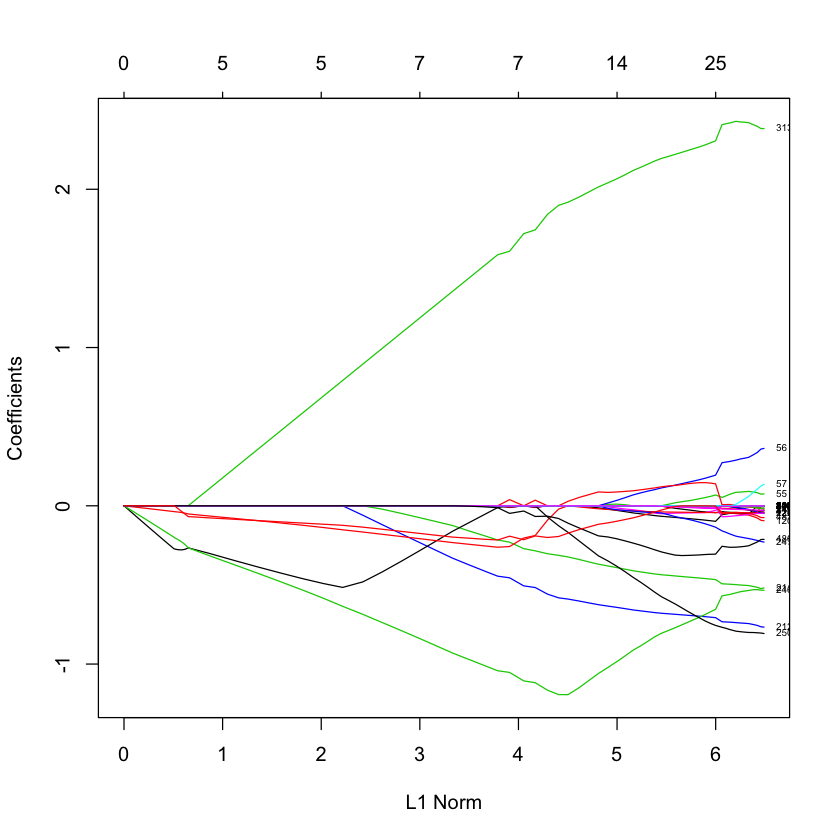

In [6]:
plot(fit, label = TRUE)

What happened? What's on the plot? Play around with the arguments.

The predict function allows us to do predictions on the test set:

In [7]:
Ypred = predict(fit, newx = Xtest, s = 0.0001) # s corresponds to lambda

In [8]:
sum ((Ypred - Ytest)^2)

[1] 1.123826

The cvfit function allows to do cross-validation. Learn to use it. See how it compares to the test set error.

Compare the results with the estimators we implemented last week (ridge, Moore-Penrose)